In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
airbnb = pd.read_csv("filtered_nyc_airbnb_2019.csv")
airbnb.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
sns.pairplot(airbnb)
# there appears to be very little apparent correlation

In [ ]:
sns.relplot(x = "price", y = "number_of_reviews", hue = "neighbourhood_group", data = airbnb)
# there appears to be correlation between borough and price but there is a lot of noise

In [4]:
price_means_by_borough = airbnb.groupby(["neighbourhood_group"])["price"].mean()
price_means_by_borough

neighbourhood_group
Bronx             72.938045
Brooklyn         107.521311
Manhattan        163.416889
Queens            88.708696
Staten Island     89.341598
Name: price, dtype: float64

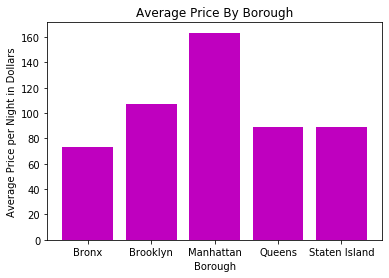

In [5]:
plt.bar(np.unique(airbnb["neighbourhood_group"]), price_means_by_borough, color = 'm')
plt.title("Average Price By Borough")
plt.xlabel("Borough")
plt.ylabel("Average Price per Night in Dollars")
plt.savefig("plots/average_price_by_borough.png")

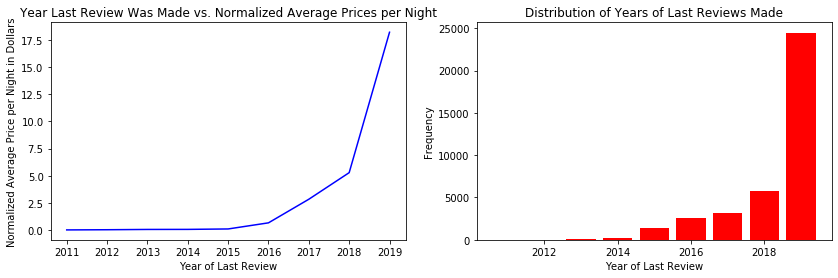

In [6]:
airbnb["last_review"] = pd.to_datetime(airbnb["last_review"])
airbnb["last_review_year"] = airbnb["last_review"].dt.year

price_means_by_last_review_year = airbnb.groupby(["last_review_year"])["price"].mean()

last_review_year_value_counts = airbnb["last_review_year"].value_counts()

fig = plt.figure(figsize = (14, 4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(price_means_by_last_review_year / last_review_year_value_counts.values, color = 'b')
ax1.set_title("Year Last Review Was Made vs. Normalized Average Prices per Night")
ax1.set_xlabel("Year of Last Review")
ax1.set_ylabel("Normalized Average Price per Night in Dollars")

ax2 = fig.add_subplot(1,2,2)
plt.bar(last_review_year_value_counts.index,
       last_review_year_value_counts.values, color = 'r')
ax2.set_title("Distribution of Years of Last Reviews Made")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Year of Last Review")

plt.savefig("plots/year_of_last_review_vs_average_price.png")

In [7]:
price_means_by_room_type = airbnb.groupby(["room_type"])["price"].mean()
price_means_by_room_type


room_type
Entire home/apt    176.209221
Private room        81.215875
Shared room         62.863676
Name: price, dtype: float64

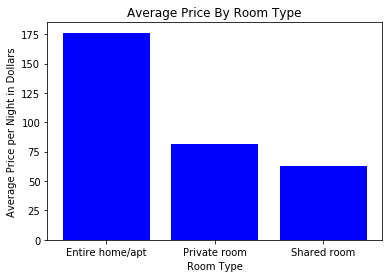

In [8]:
plt.bar(np.unique(airbnb["room_type"]), price_means_by_room_type, color = 'b')
plt.title("Average Price By Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price per Night in Dollars")
plt.savefig("plots/average_price_by_room_type.png")

In [9]:
len(airbnb)

46901

In [17]:
airbnb_sample = airbnb.sample(500, replace = False)

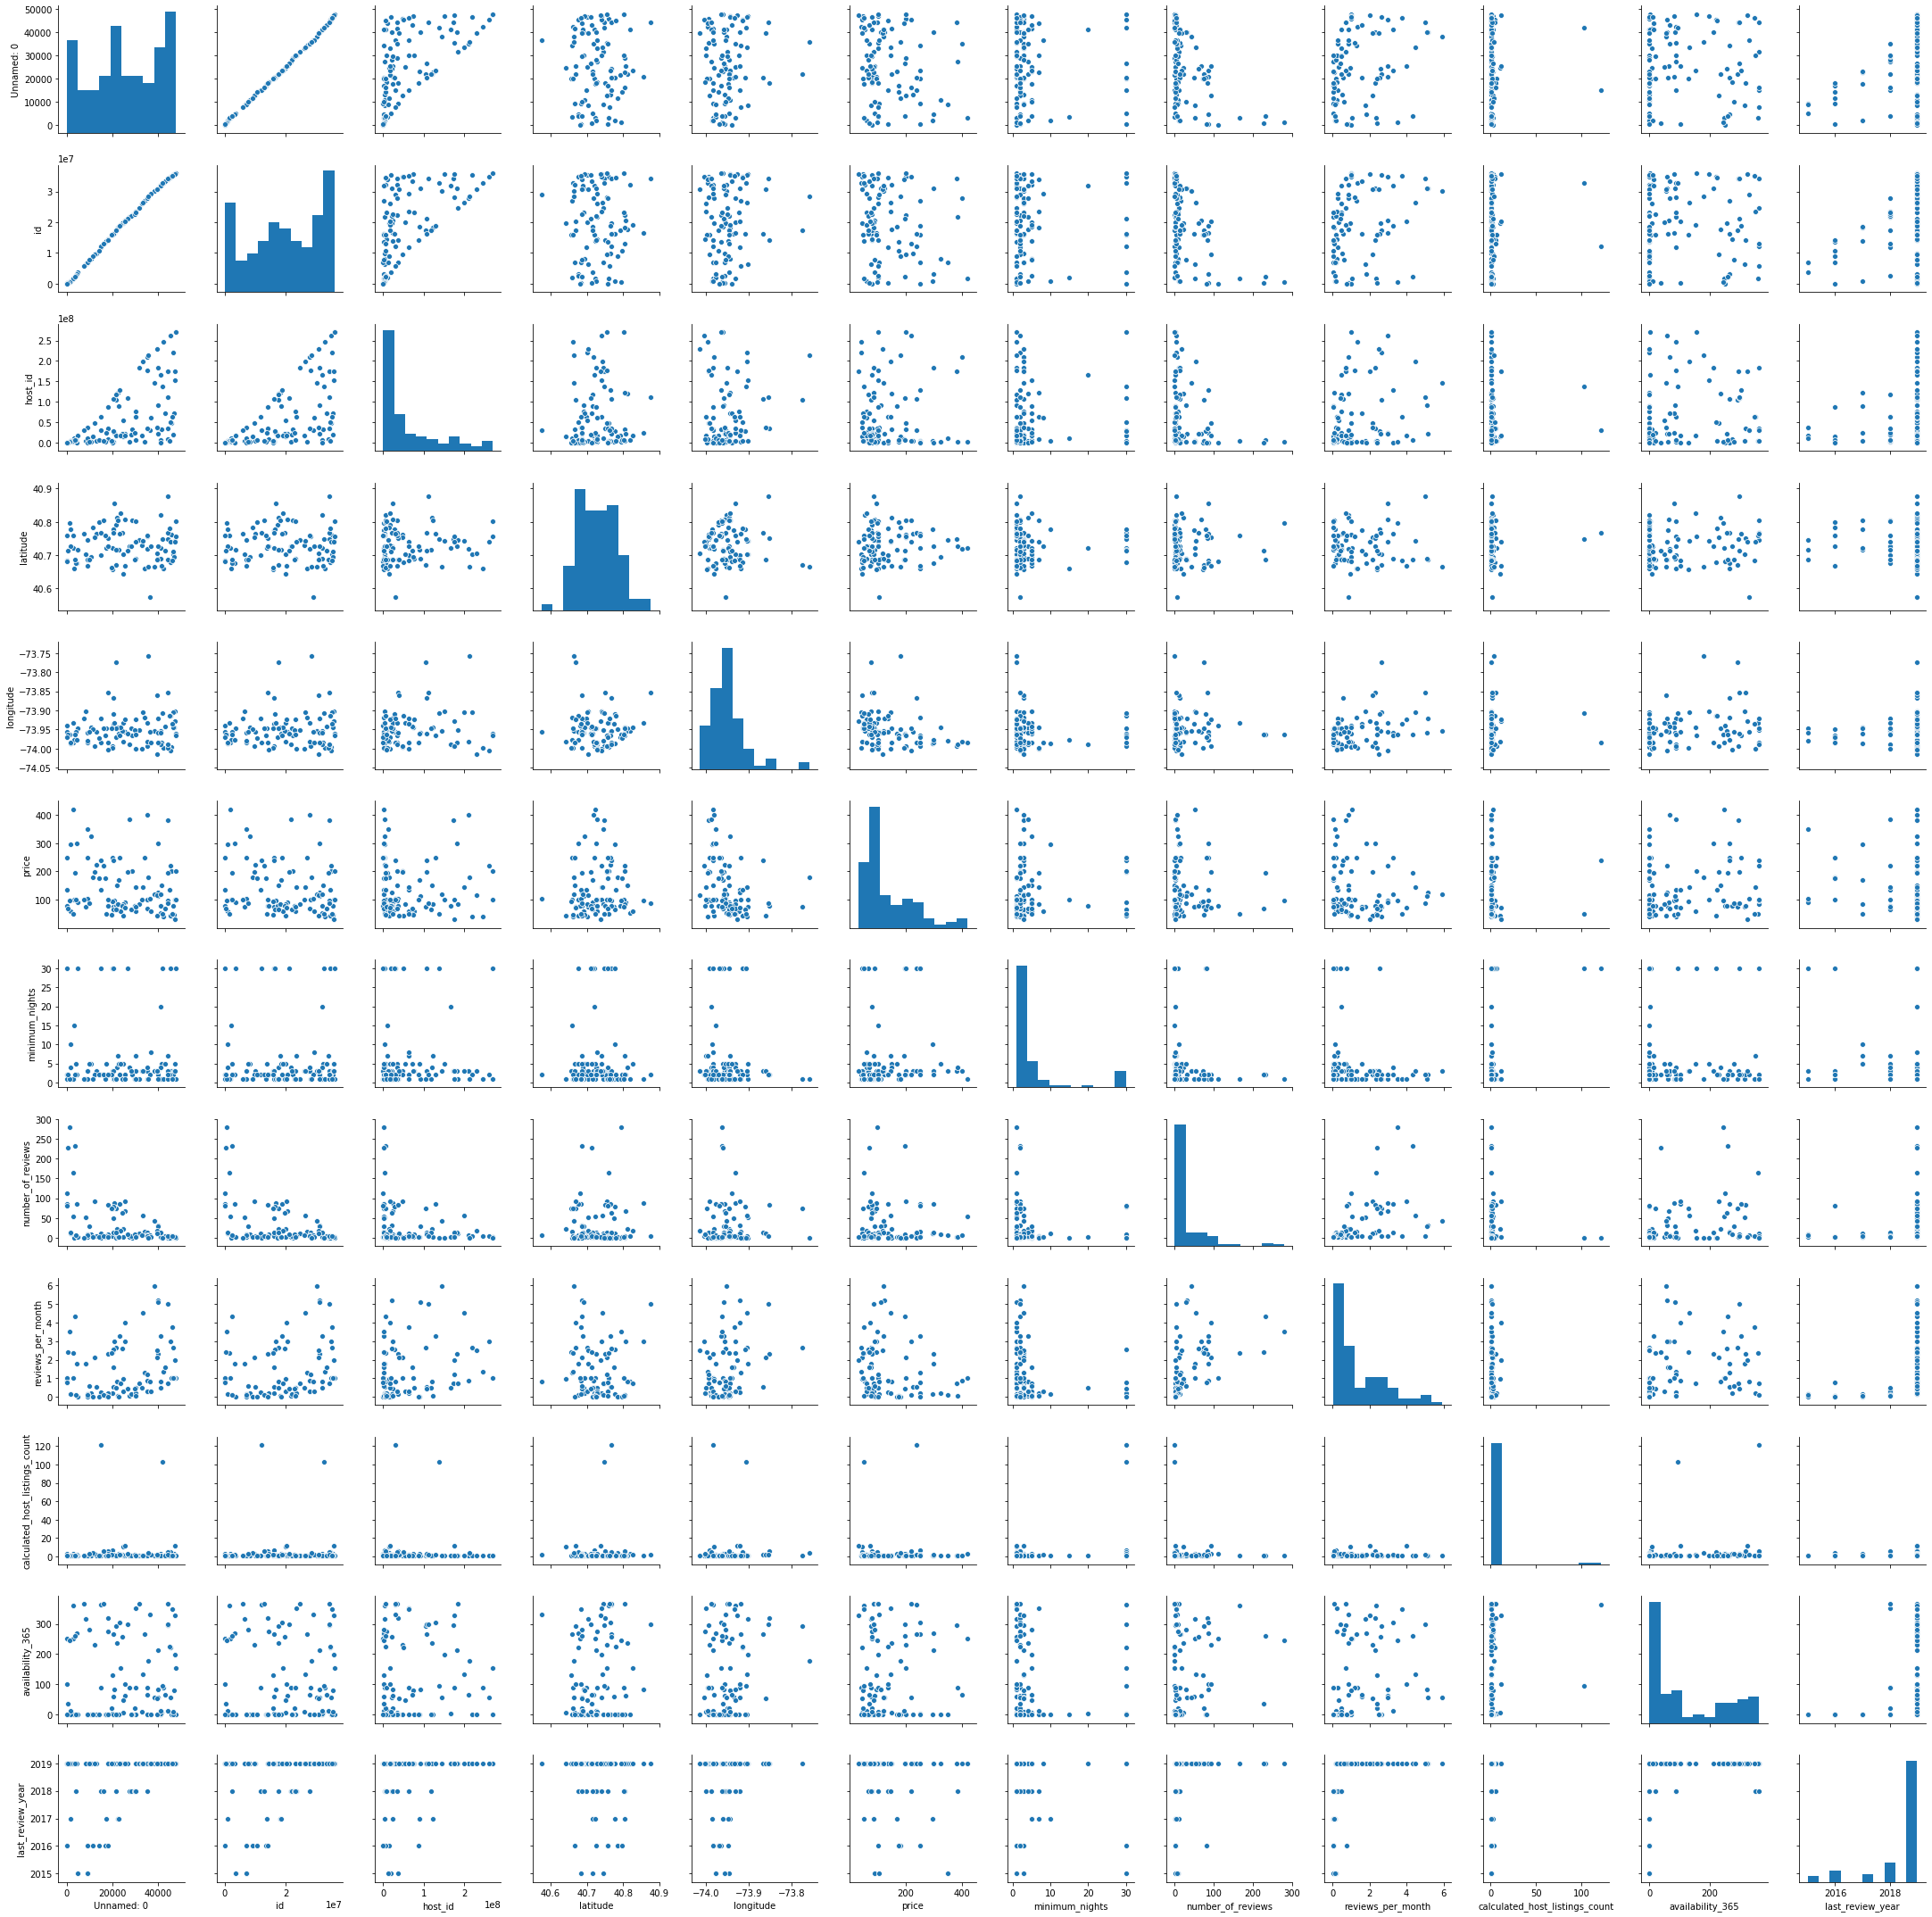

In [13]:
sns.pairplot(airbnb_sample)

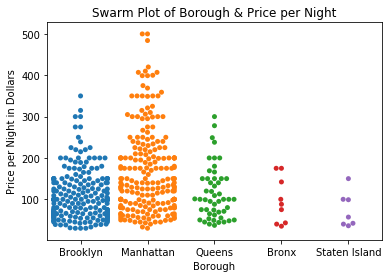

In [27]:
sns.swarmplot(x = "neighbourhood_group", y = "price", data = airbnb_sample)
plt.title("Swarm Plot of Borough & Price per Night")
plt.xlabel("Borough")
plt.ylabel("Price per Night in Dollars")
plt.savefig("plots/swarm_plot_borough_and_price.png")

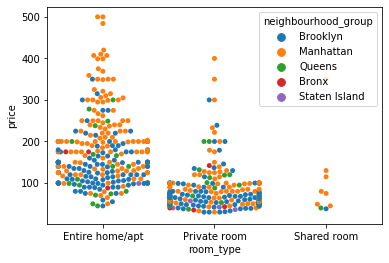

In [25]:
sns.swarmplot(x = "room_type", y = "price", hue = "neighbourhood_group", data = airbnb_sample)
# informative but confusing to look at... doesn't provide that much extra information...